In [1]:
from HeaderP import *
import os

In [12]:
kepler = pd.read_table('https://arxiv.org/src/1402.5694v2/anc/Table_1_Periodic.txt', delimiter=',')
kepler

gaiakepler = readfits('../../../FirstYearML/kepler_dr2_1arcsec.fits')

kepler = pd.merge(kepler, gaiakepler, left_on='KID', right_on='kepid', how='inner')


Mearth = pd.read_csv("../../MEarth_Rotator_List_v2.csv")



/Users/yl4331/Desktop/ZTF/osg/ZTF_gaiaCross/HeaderP.py:378: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  return(pd.DataFrame(data[1].data,dtype='float64'))


In [153]:
gaiadata = pd.read_pickle('../../gaia_obsnumb_absg7.pkl')
len(gaiadata)*0.01

74395.82

# rerun from here

In [155]:
files = os.listdir('./')
files = [i for i in files if ('prot' in i)]
print(len(files))

2739


In [156]:
df = pd.read_csv(files[0])
for i in trange(1,len(files)):
    df = pd.concat([df, pd.read_csv(files[i])])

100%|██████████| 2738/2738 [01:14<00:00, 36.62it/s]


In [157]:
def getgoodProt(df):
    maxpowers = np.zeros(len(df))
    maxpowerprot = np.zeros(len(df))
    for i in trange(len(df)):
        df_sing = df.iloc[i]
        powers = df_sing[['maxpower1','maxpower2','maxpower3','maxpower4',
                                   'maxpower5','maxpower6','maxpower7']].values
        
        maxpowers[i] = max(powers)
        if maxpowers[i]!=maxpowers[i]:
            maxpowerprot[i] = np.nan
            continue
        maxp = df_sing[['prot1','prot2','prot3','prot4','prot5','prot6','prot7']].values[powers==maxpowers[i]]
        try:
            maxpowerprot[i] = maxp
        except:
            maxpowerprot[i] = maxp[0]
        
    df['maxpowers'] = maxpowers
    df['maxpowerprot'] = maxpowerprot
    return df

In [158]:
df = getgoodProt(df)
print(len(df))

100%|██████████| 452337/452337 [02:45<00:00, 2725.68it/s]

452337


In [159]:
df_filt = df.loc[df['maxpowers']>0.59]
df_filt = df_filt.loc[df_filt['maxpowerprot']>1.1]
print(len(df_filt))
df_filt


5527


,gaiaid,bprp,gmag,rv,id,ra,dec,prot1,prot2,prot3,...,medpower3,medpower4,medpower5,medpower6,medpower7,nl,dt,tt,maxpowers,maxpowerprot
11,3795681062987599104,1.618277,15.482364,NaN,421215200000029,176.645430,1.088620,106.983181,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,0.017252,0.039735,0.615175,106.983181
54,3086020970973219328,2.185469,14.352176,NaN,412213100000063,117.566590,1.098570,1.220514,1.423293,3.881837,...,0.036573,0.015897,NaN,NaN,NaN,44,0.124793,32.923382,0.868429,1.423293
64,3087318394693521408,1.915715,16.631481,NaN,412213100000073,117.405624,1.097813,3.615429,2.763599,6.736443,...,0.043592,0.025068,NaN,NaN,NaN,62,0.097402,46.647951,0.704036,2.763599
189,3085787702709319424,2.108012,15.901716,NaN,412213100000230,117.749720,1.085457,0.997516,0.878639,9.849010,...,0.033329,0.018314,NaN,NaN,NaN,61,8.363772,46.247644,0.701622,10.024409
59,3264873098621187968,2.537776,15.052441,NaN,454203300000174,52.557346,1.632841,18.792871,19.126079,18.537721,...,0.030536,0.020834,NaN,NaN,NaN,10,0.058047,2.205944,0.721777,19.126079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,3221108442732490368,2.817125,16.821957,NaN,408216100000111,83.762630,1.054452,3.121958,3.133852,3.132678,...,0.026883,0.019598,NaN,NaN,NaN,101,0.142584,8.017950,0.671768,3.133852
130,3222402739717906560,2.269037,15.953016,NaN,408216100000163,83.758690,1.049239,5.232950,5.231121,5.234589,...,0.027960,0.018411,NaN,NaN,NaN,56,0.110941,4.624717,0.944095,5.243264
132,3222410642455930240,2.767360,17.065393,NaN,408216100000165,83.408750,1.048344,3.994317,3.995570,3.989220,...,0.022217,0.016075,NaN,NaN,NaN,70,0.111676,5.827716,0.916522,3.995570
164,3222429849549856768,2.692718,17.039658,NaN,408216100000205,83.944550,1.045810,3.245842,3.241402,3.241134,...,0.023612,0.020500,NaN,NaN,NaN,108,0.140357,9.140734,0.611740,3.241134


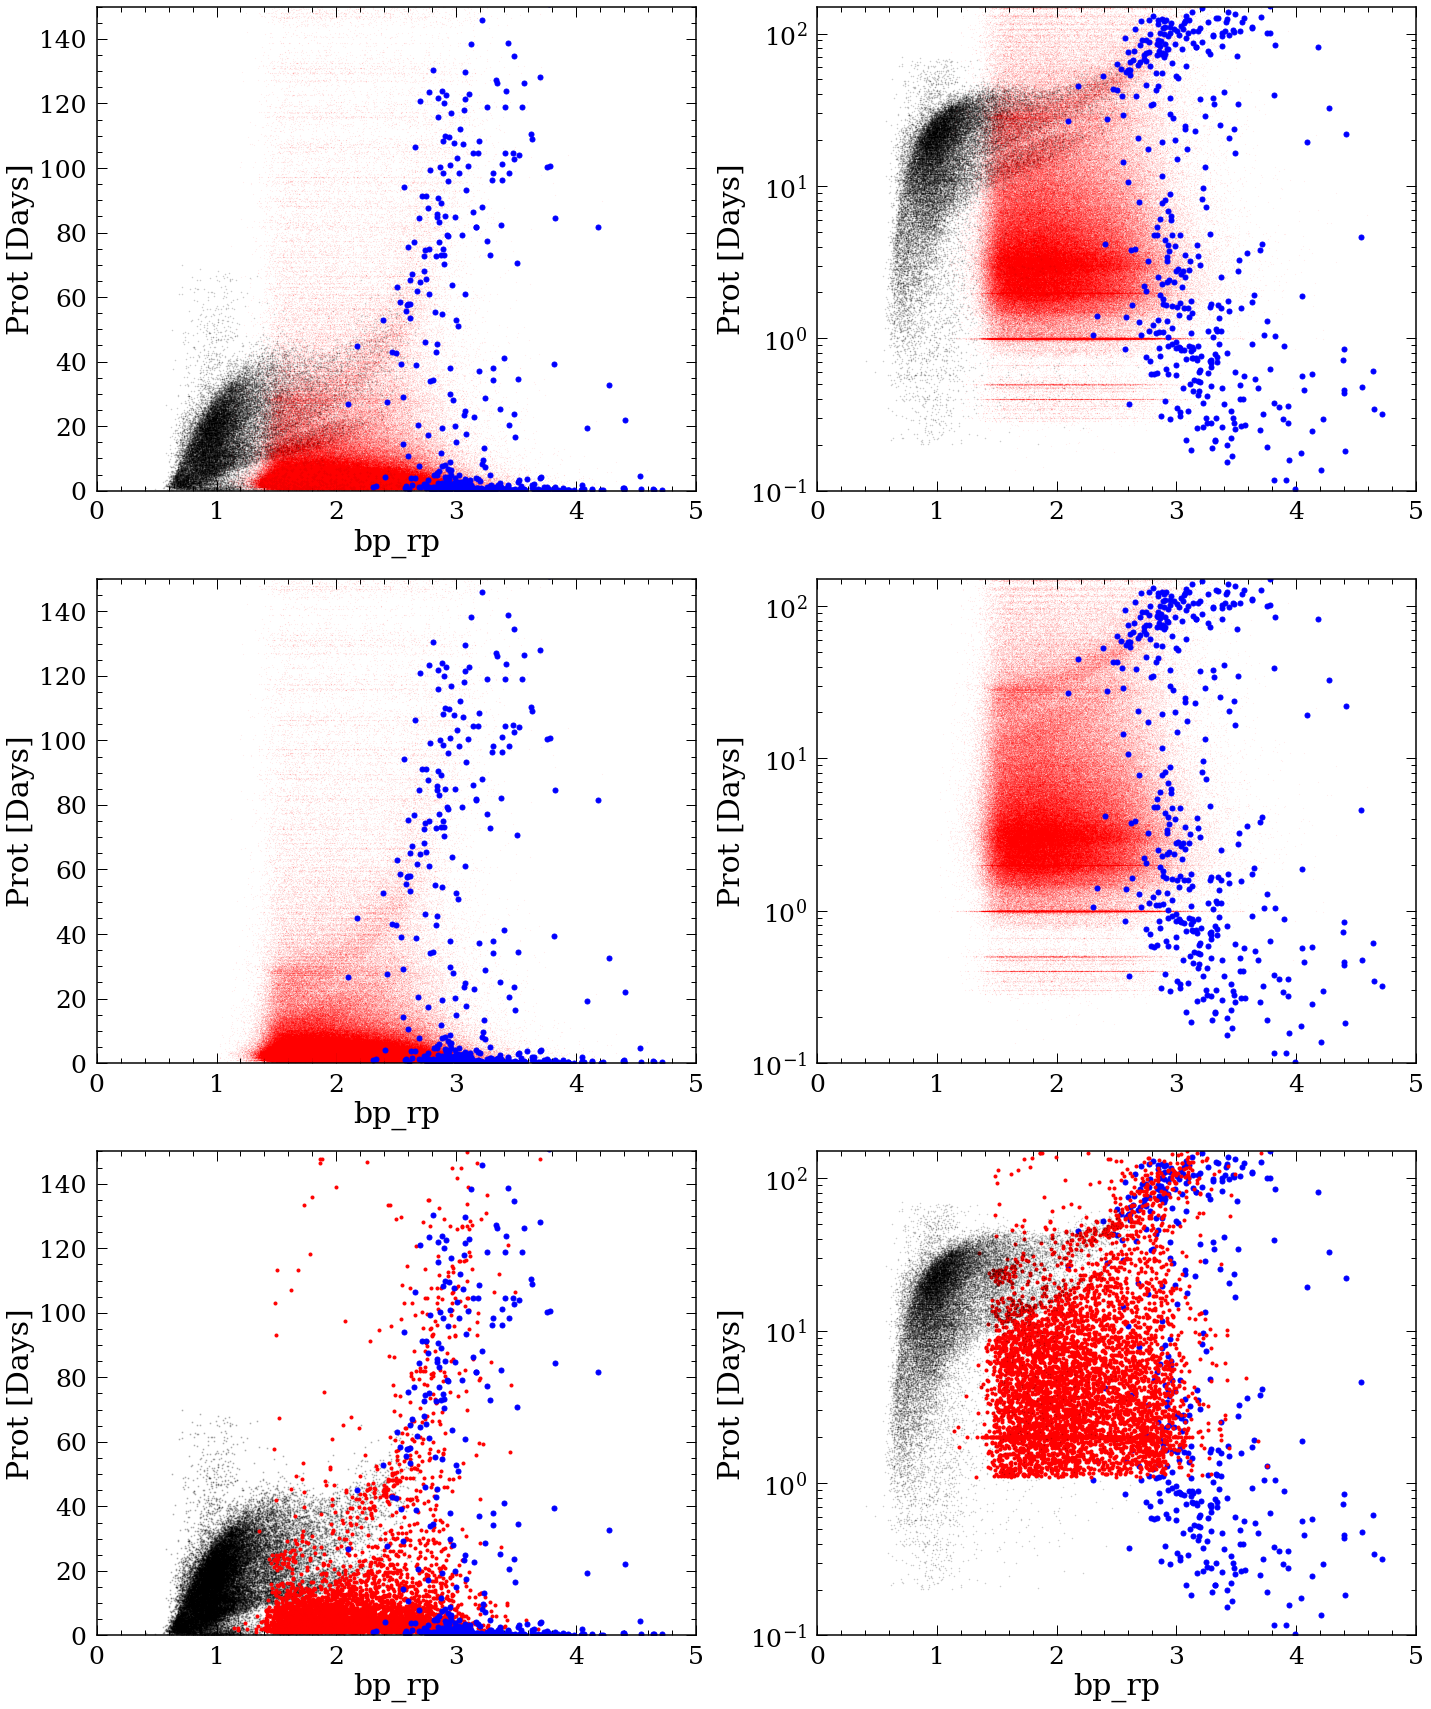

In [160]:
plt.figure(figsize=(20,24))
plt.subplot(3,2,1)
plt.plot(kepler['bp_rp'],kepler['Prot'],'k.',alpha=0.2,markersize=1)
plt.plot(df['bprp'],df['maxpowerprot'],'r.',markersize=0.05)
plt.plot(Mearth['BP-RP'],Mearth['Prot'],'b.',markersize=10)
plt.xlabel('bp_rp')
plt.ylim([0,150])
plt.xlim([0,5])
plt.ylabel('Prot [Days]')

plt.subplot(3,2,2)
plt.plot(kepler['bp_rp'],kepler['Prot'],'k.',alpha=0.2,markersize=1)
plt.plot(df['bprp'],df['maxpowerprot'],'r.',markersize=0.05)
plt.plot(Mearth['BP-RP'],Mearth['Prot'],'b.',markersize=10)
plt.yscale('log')
plt.ylim([1e-1,150])
plt.xlim([0,5])
plt.ylabel('Prot [Days]')

plt.subplot(3,2,3)
plt.plot(df['bprp'],df['maxpowerprot'],'r.',markersize=0.05)
plt.plot(Mearth['BP-RP'],Mearth['Prot'],'b.',markersize=10)
plt.xlabel('bp_rp')
plt.ylim([0,150])
plt.xlim([0,5])
plt.ylabel('Prot [Days]')

plt.subplot(3,2,4)
plt.plot(df['bprp'],df['maxpowerprot'],'r.',markersize=0.05)
plt.plot(Mearth['BP-RP'],Mearth['Prot'],'b.',markersize=10)
plt.ylim([1e-1,150])
plt.xlim([0,5])
plt.yscale('log')
plt.ylabel('Prot [Days]')

plt.subplot(3,2,5)
plt.plot(kepler['bp_rp'],kepler['Prot'],'k.',alpha=0.2,markersize=2)
plt.plot(df_filt['bprp'],df_filt['maxpowerprot'],'r.')
plt.plot(Mearth['BP-RP'],Mearth['Prot'],'b.',markersize=10)
plt.xlabel('bp_rp')
plt.ylim([0,150])
plt.xlim([0,5])
plt.ylabel('Prot [Days]')

plt.subplot(3,2,6)
plt.plot(Mearth['BP-RP'],Mearth['Prot'],'b.',markersize=10)
plt.plot(df_filt['bprp'],df_filt['maxpowerprot'],'r.')
plt.plot(kepler['bp_rp'],kepler['Prot'],'k.',alpha=0.2,markersize=1)

plt.yscale('log')
plt.xlabel('bp_rp')
plt.ylim([1e-1,150])
plt.xlim([0,5])
plt.ylabel('Prot [Days]')
plt.tight_layout()
plt.savefig('ZTFgaia.png')

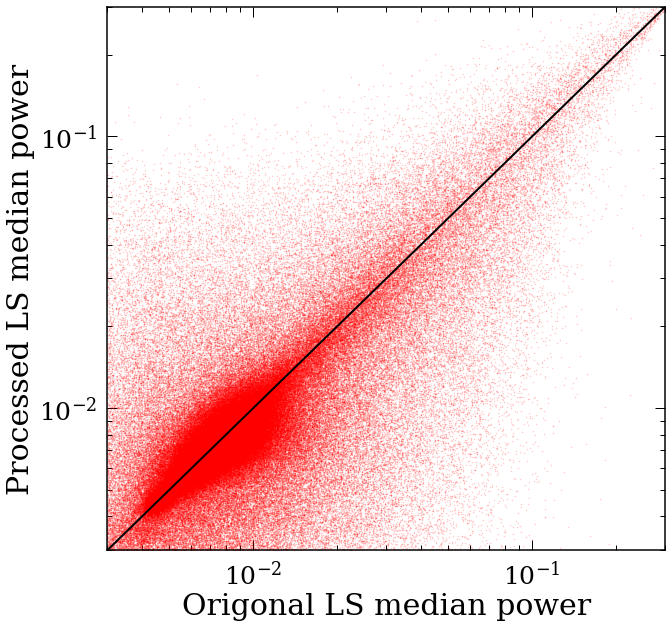

In [161]:
plt.plot(df['medpower_org'], df['medpower1'], 'r.', markersize=1, alpha=0.2)
plt.plot([3e-3,0.3], [3e-3,0.3], 'k-')
plt.xlim([3e-3,0.3])
plt.ylim([3e-3,0.3])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Origonal LS median power')
plt.ylabel('Processed LS median power')

df = df.dropna(subset=['medpower_org']).reset_index(drop=True)
df = df.dropna(subset=['medpower1']).reset_index(drop=True)

p = fitpoints(df['medpower_org'], df['medpower1'])
#plt.plot([3e-3,0.3], p([3e-3,0.3]), 'b--')

#scat = np.std(df['medpower_org'] - df['medpower1'])
#bia = np.mean(df['medpower_org'] - df['medpower1'])
#plt.title('Scatter: %.5f, Bias: %.5f'%(scat, bia), fontsize=25)